# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

The goal of this project is to outline which plan makes us more money between the surf plan and the ultimate plan. In order to do that we are first going to load our dataframes and print them out and see if there is any underlining issues with them before digging in further. After we take care of that we'll be looking at monthly internet usage,  call count, & number of messages sent. We'll be using that with the megaline plan to find the monthly revenue of each user and from there we will be looking at how the plans differ with usage as well as revenue between the two. We will end on finding out which one of the data plans, if either, brings in more revenue so we can increase the advertising budget on.
After that we'll be running a hypothesis on determining if the Ultimate Plan brings in the most revenue and if the New York New Jersey area has a differnece in revenue it brings in.

## Initialization

We are going to load our libaries to take a look at all the dataframes to use to help and see what plan brings in more revenue between Surf and Ultimate.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

calls = pd.read_csv('/datasets/megaline_calls.csv') 

internet = pd.read_csv('/datasets/megaline_internet.csv') 

messages = pd.read_csv('/datasets/megaline_messages.csv') 

megaline_plans = pd.read_csv('/datasets/megaline_plans.csv') 

megaline_users = pd.read_csv('/datasets/megaline_users.csv')


## Load data

Were going to load the tables and look at what kind of data we are working with

In [2]:
# Load the data files into different DataFrames
calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [3]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [4]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [5]:
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Prepare the data

## Plans

In [7]:
# Print the general/summary information about the plans' DataFrame
megaline_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [8]:
# Print a sample of data for plans
megaline_plans.sample(2)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


We printed out the plan info in a dataframe. We see there are two rows 1 for the ultimate plan and 1 for the surf plan.

## Fix data

In [9]:
#turn mb_per_month_included to gb_per_month_included
megaline_plans['mb_per_month_included'] = megaline_plans['mb_per_month_included'] /1024
megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Enrich data

In [10]:
#change name of mb_per_month_included column
megaline_plans.rename(columns = {'mb_per_month_included':'gb_per_month_included'}, inplace=True)
megaline_plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Users

In [11]:
# Print the general/summary information about the users' DataFrame

megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
# Print a sample of data for users
megaline_users.sample(5)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaN
294,1294,Demetrius,Russo,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN
166,1166,Kaycee,Bryant,26,"Baltimore-Columbia-Towson, MD MSA",2018-05-07,surf,NaN
147,1147,Duncan,Malone,71,"Urban Honolulu, HI MSA",2018-04-30,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


As we see from the info we notice that the reg_date column dtype is an object rather than datetime. So we need to cheeck that. We are going to check for dups just to insure there isn't any repeating rows as well. We are also making it so there is a df with just  user_id and plan to add plans into other dataframes.

### Fix Data

In [13]:
#search for dups
print(megaline_users.duplicated().sum())


0


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [14]:
#fixing date format on reg_date 
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'], format='%Y-%m-%d')

megaline_users.info()
#making a table with only user_id and plan to allow us to see users plans more easily
users_id = megaline_users[['user_id', 'plan']]
users_id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf
...,...,...
495,1495,surf
496,1496,surf
497,1497,ultimate
498,1498,surf


## Calls

In [15]:
# Print the general/summary information about the calls' DataFrame

calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Print a sample of data for calls
calls.sample(5)

,id,user_id,call_date,duration
39339,1147_62,1147,2018-05-14,14.30
130010,1467_246,1467,2018-05-25,3.82
100127,1358_611,1358,2018-07-19,9.86
60114,1216_99,1216,2018-12-14,18.92
15158,1061_100,1061,2018-11-01,19.86


The first thing we notice is that call_date is not set up in datatime format, so we have to fix that. We are going to check for any duplications just to ensure there isn't duplicated data. We are also going to make columns with the month and year by pulling from the call date to make things easier down the line when looking atr this data. 

### Fix data

In [17]:
#search for dups
calls.duplicated().sum()
# round up duration to the nearest min
calls['duration'] = np.ceil(calls['duration'])
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


### Enrich data

In [18]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int64         
 5   year       137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.3+ MB


## Messages

In [19]:
# Print the general/summary information about the messages' DataFrame
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
# Print a sample of data for message
messages.sample(5)


,id,user_id,message_date
5184,1051_14,1051,2018-12-30
33361,1211_37,1211,2018-08-30
45797,1312_281,1312,2018-09-12
49101,1328_59,1328,2018-08-07
68731,1444_214,1444,2018-11-19


In the message_date column we are going to make that a datetime format. We are going to be adding in a month and a year column as well to work with later. And then we'll be looking at things to see if there are any duplicates. 

### Fix data

In [21]:
#search for dups
messages.duplicated().sum()

0

### Enrich data

In [22]:
#change message datetime format
messages['message_date'] =  pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['year'] = messages['message_date'].dt.year
messages['month'] = messages['message_date'].dt.month
messages.info()
messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   year          76051 non-null  int64         
 4   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.9+ MB


,id,user_id,message_date,year,month
0,1000_125,1000,2018-12-27,2018,12
1,1000_160,1000,2018-12-31,2018,12
2,1000_223,1000,2018-12-31,2018,12
3,1000_251,1000,2018-12-27,2018,12
4,1000_255,1000,2018-12-26,2018,12
...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018,12
76047,1497_536,1497,2018-12-24,2018,12
76048,1497_547,1497,2018-12-31,2018,12
76049,1497_558,1497,2018-12-24,2018,12


## Internet

In [23]:
# Print the general/summary information about the internet DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [24]:
# Print a sample of data for the internet traffic
internet.sample(5)


,id,user_id,session_date,mb_used
62199,1283_97,1283,2018-12-11,386.68
29544,1134_474,1134,2018-10-23,172.67
4143,1026_50,1026,2018-07-29,721.53
36640,1164_323,1164,2018-06-23,656.63
19529,1088_303,1088,2018-05-30,0.00


Just like the last two df we worked with we need to put session_date to datetime format and make a month and year column for them for sakes down the line. And then check for duplicates.

### Fix data

In [25]:
#check for duplicates
internet.duplicated().sum()

0

### Enrich data

In [26]:
#format session date into datetime format
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year
internet.info()
internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
 5   year          104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 4.8+ MB


,id,user_id,session_date,mb_used,month,year
0,1000_13,1000,2018-12-29,89.86,12,2018
1,1000_204,1000,2018-12-31,0.00,12,2018
2,1000_379,1000,2018-12-28,660.40,12,2018
3,1000_413,1000,2018-12-26,270.99,12,2018
4,1000_442,1000,2018-12-27,880.22,12,2018
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,2018
104821,1499_216,1499,2018-12-30,304.72,12,2018
104822,1499_217,1499,2018-09-22,292.75,9,2018
104823,1499_218,1499,2018-12-07,0.00,12,2018


## Study plan conditions

In [27]:
# Print out the plan conditions and make sure they are clear for you
megaline_plans


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user


In [28]:
# Calculate the number of calls made by each user per month. Save the result.


#call groupby to sort user_id by year and month
calls_per_month = calls.groupby(['user_id', 'year', 'month']).size().reset_index(name='call_count')
calls_per_month



,user_id,year,month,call_count
0,1000,2018,12,16
1,1001,2018,8,27
2,1001,2018,9,49
3,1001,2018,10,65
4,1001,2018,11,64
...,...,...,...,...
2253,1498,2018,12,39
2254,1499,2018,9,41
2255,1499,2018,10,53
2256,1499,2018,11,45


In [29]:
# Calculate the amount of minutes spent by each user per month. Save the result.
#use groupby to find sum per month
monthly_call_time = calls.groupby(['user_id', 'month', 'year'])['duration'].sum().reset_index(name='total_minutes')
monthly_call_time 

,user_id,month,year,total_minutes
0,1000,12,2018,124.0
1,1001,8,2018,182.0
2,1001,9,2018,315.0
3,1001,10,2018,393.0
4,1001,11,2018,426.0
...,...,...,...,...
2253,1498,12,2018,339.0
2254,1499,9,2018,346.0
2255,1499,10,2018,385.0
2256,1499,11,2018,308.0


In [30]:
# Calculate the number of messages sent by each user per month. Save the result.

monthly_messages =messages.groupby(['user_id', 'year', 'month']).size().reset_index(name= 'number_of_messages')
monthly_messages

,user_id,year,month,number_of_messages
0,1000,2018,12,11
1,1001,2018,8,30
2,1001,2018,9,44
3,1001,2018,10,53
4,1001,2018,11,36
...,...,...,...,...
1801,1496,2018,9,21
1802,1496,2018,10,18
1803,1496,2018,11,13
1804,1496,2018,12,11


In [31]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

monthly_internet = internet.groupby(['user_id', 'year', 'month'])['mb_used'].sum().reset_index(name='monthly_mb_usage')
#Convertinng megabytes to gigabytes
monthly_internet['monthly_mb_usage'] = monthly_internet['monthly_mb_usage'] / 1024
monthly_internet
#round up internet usage
monthly_internet['monthly_mb_usage'] = np.ceil(monthly_internet['monthly_mb_usage'])
#changing mb usage column to gb to describe columnn better
monthly_internet.rename(columns = {'monthly_mb_usage':'monthly_gb_usage'}, inplace=True)
monthly_internet

,user_id,year,month,monthly_gb_usage
0,1000,2018,12,2.0
1,1001,2018,8,7.0
2,1001,2018,9,14.0
3,1001,2018,10,22.0
4,1001,2018,11,19.0
...,...,...,...,...
2272,1498,2018,12,23.0
2273,1499,2018,9,13.0
2274,1499,2018,10,20.0
2275,1499,2018,11,17.0


We've made 4 new df above. We did one adding up number of calls, one with total number of messages one with call time and one with internet usage. Now we can merge them all.

In [32]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
#call merge to merge all 3 dfs
user_month_usage = monthly_call_time.merge(monthly_internet, on='user_id').merge(monthly_messages, on='user_id').merge(users_id, on='user_id')
#drop uneeded columns
user_month_usage = user_month_usage.drop(columns=['month_x', 'year_x', 'year_y', 'month_y'])
#print df
user_month_usage


,user_id,total_minutes,monthly_gb_usage,year,month,number_of_messages,plan
0,1000,124.0,2.0,2018,12,11,ultimate
1,1001,182.0,7.0,2018,8,30,surf
2,1001,182.0,7.0,2018,9,44,surf
3,1001,182.0,7.0,2018,10,53,surf
4,1001,182.0,7.0,2018,11,36,surf
...,...,...,...,...,...,...,...
84735,1496,294.0,17.0,2018,9,21,surf
84736,1496,294.0,17.0,2018,10,18,surf
84737,1496,294.0,17.0,2018,11,13,surf
84738,1496,294.0,17.0,2018,12,11,surf


In [33]:
# Add the plan information

megaline_plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


In [34]:
# Calculate the monthly revenue for each user

user_month_usage

#the plans of the services
df_plans = pd.DataFrame({
    'usd_per_minute': [0.03, 0.01],       
    'usd_per_message': [0.03, 0.01],
     'usd_per_gb': [10, 7],
     'usd_monthly_pay': [20, 70],
     'minutes_included': [500, 3000],
     'gb_per_month_included': [15, 30], 
     'messages_included': [50, 1000],
     'plan_name': ['surf', 'ultimate']
})

# Merge the DataFrames on the plan column
user_month_usage = pd.merge(user_month_usage, df_plans, left_on='plan', right_on='plan_name', how='left')

# Drop the 'plan_name' column since it's redundant after merging
user_month_usage = user_month_usage.drop(columns='plan_name')

          
         


#use function to calculate revene

def monthly_revenue(row):
    try:
        
 
        minutes_charges = max(0, row['total_minutes'] - row['minutes_included'])
        messages_charges = max(0, row['number_of_messages'] - row['messages_included'])
        internet_charges = max(0, row['monthly_gb_usage'] - (row['gb_per_month_included'] ))
                       
        call_cost = minutes_charges * row['usd_per_minute']
        message_cost = messages_charges * row['usd_per_message']
        internet_cost = internet_charges  * row['usd_per_gb']
        total_cost = call_cost + message_cost + internet_cost + row['usd_monthly_pay']
                        
        return total_cost
    except KeyError as e:
        print(f"KeyError: {e} in row:\n{row}")
        return np.nan
user_month_usage['monthly_revenue'] = user_month_usage.apply(monthly_revenue, axis=1)

user_month_usage
                                
                        

,user_id,total_minutes,monthly_gb_usage,year,month,number_of_messages,plan,usd_per_minute,usd_per_message,usd_per_gb,usd_monthly_pay,minutes_included,gb_per_month_included,messages_included,monthly_revenue
0,1000,124.0,2.0,2018,12,11,ultimate,0.01,0.01,7,70,3000,30,1000,70.00
1,1001,182.0,7.0,2018,8,30,surf,0.03,0.03,10,20,500,15,50,20.00
2,1001,182.0,7.0,2018,9,44,surf,0.03,0.03,10,20,500,15,50,20.00
3,1001,182.0,7.0,2018,10,53,surf,0.03,0.03,10,20,500,15,50,20.09
4,1001,182.0,7.0,2018,11,36,surf,0.03,0.03,10,20,500,15,50,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84735,1496,294.0,17.0,2018,9,21,surf,0.03,0.03,10,20,500,15,50,40.00
84736,1496,294.0,17.0,2018,10,18,surf,0.03,0.03,10,20,500,15,50,40.00
84737,1496,294.0,17.0,2018,11,13,surf,0.03,0.03,10,20,500,15,50,40.00
84738,1496,294.0,17.0,2018,12,11,surf,0.03,0.03,10,20,500,15,50,40.00


## Study user behaviour

### Calls

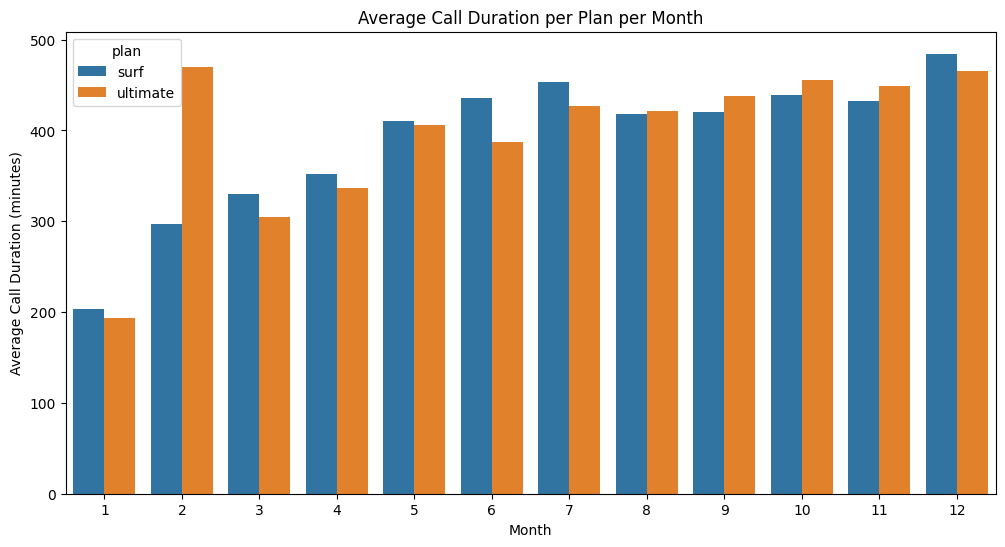

In [35]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
#merge plan type on
monthly_call_total = monthly_call_time.merge(users_id, on='user_id')

monthly_call_total
monthly_call_avg = monthly_call_total.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()
monthly_call_total
#plotting the df into a bar chart

                                                
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_call_avg, x='month', y='total_minutes', hue='plan')
plt.title('Average Call Duration per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.show()


We see that for most months other than the second that surf plan and ultimate call duration is relitively close together time wise. May-December also has very close call durations on average per month. January is also the month with the smallest call durations by roughly half compared to months from May-December

        plan  month  total_minutes
0       surf      1          406.0
1       surf      2         2673.0
2       surf      3         7590.0
3       surf      4        17577.0
4       surf      5        30768.0
5       surf      6        41836.0
6       surf      7        54448.0
7       surf      8        66438.0
8       surf      9        80360.0
9       surf     10       101846.0
10      surf     11       119801.0
11      surf     12       150680.0
12  ultimate      1          774.0
13  ultimate      2         2822.0
14  ultimate      3         3651.0
15  ultimate      4         7074.0
16  ultimate      5        11781.0
17  ultimate      6        17435.0
18  ultimate      7        25197.0
19  ultimate      8        29922.0
20  ultimate      9        37626.0
21  ultimate     10        47778.0
22  ultimate     11        56540.0
23  ultimate     12        69324.0


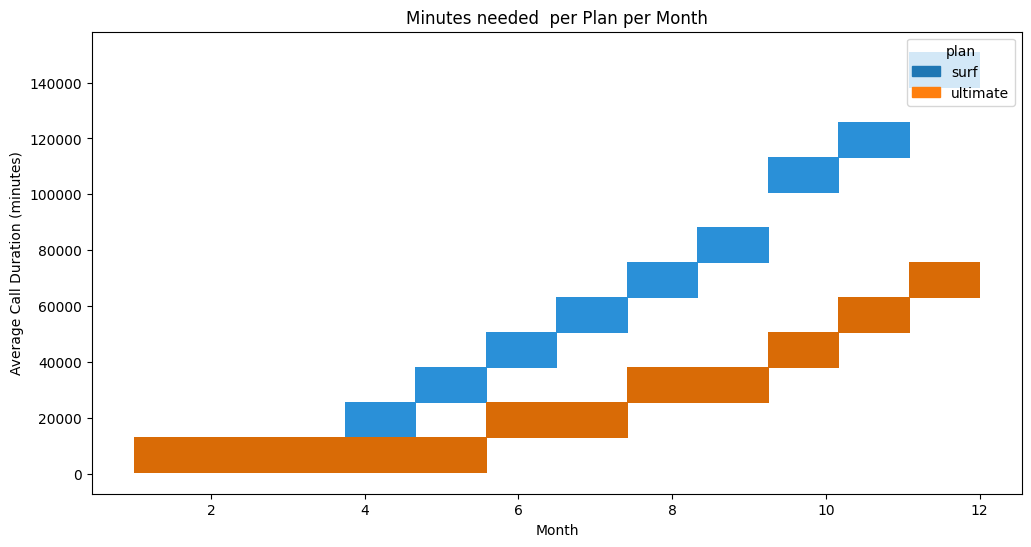

In [36]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

#group and see total minutes used per month
monthly_call_totals = monthly_call_total.groupby(['plan', 'month'])['total_minutes'].sum().reset_index()
print(monthly_call_totals)
#plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=monthly_call_totals,  x='month', y='total_minutes', hue='plan', multiple='stack',  bins=12)
plt.title('Minutes needed  per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.show()



As we can see the ultimate plan uses much less minutes than the surf plan. The amount of minutes each month goes up each month as well.

In [37]:
# Calculate the mean and the variance of the monthly call duration
print(monthly_call_total['total_minutes'].mean())
np.var(monthly_call_total['total_minutes'])

435.9375553587245


53787.33666754012

<AxesSubplot:xlabel='month', ylabel='total_minutes'>

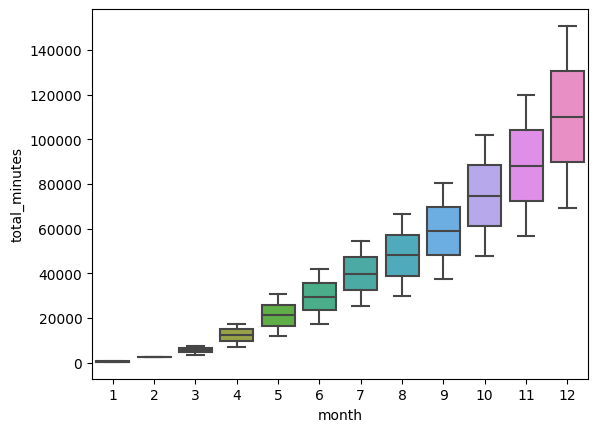

In [38]:
# Plot a boxplot to visualize the distribution of the monthly call duration
sns.boxplot(data=monthly_call_totals,  x='month', y='total_minutes')


We can see comparing the two plans that both tend to use more data the later in the year compared to earlier in the year. Now while avg call duration is pretty close to one another total minutes show that the surf plan uses more minutes than the ultimate plan.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great visualization

### Messages

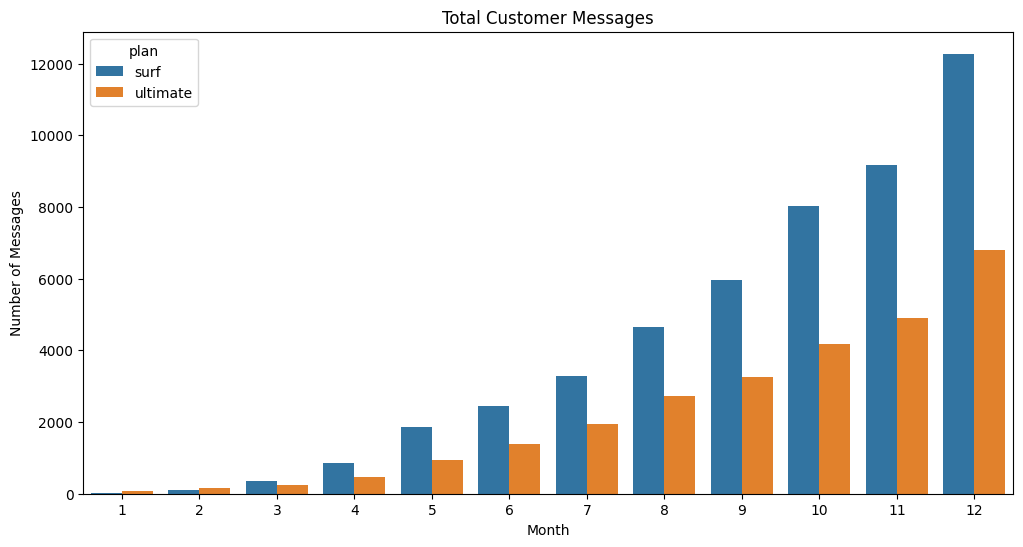

In [39]:
# Compare the number of messages users of each plan tend to send each month
#merge monthly messages to add plans
monthly_messages = monthly_messages.merge(users_id, on='user_id')
#group data to find monthly total messages
total_monthly_messages = monthly_messages.groupby(['plan', 'month'])['number_of_messages'].sum().reset_index()
total_monthly_messages
#make a bar chart 

                                                
plt.figure(figsize=(12, 6))
sns.barplot(data=total_monthly_messages, x='month', y='number_of_messages', hue='plan')
plt.title('Total Customer Messages')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.show()

We see that more messages are sent later in the year compared to earlier months. We also see more messages are sent from the surf plan every month except for january and feburary. 

In [40]:
# Calculate the mean and the variance of the number of messages
#calculate the avg
print(total_monthly_messages['number_of_messages'].mean())

#calculating the variance
np.var(total_monthly_messages['number_of_messages'])

3168.7916666666665


10374934.664930556

<AxesSubplot:xlabel='month', ylabel='number_of_messages'>

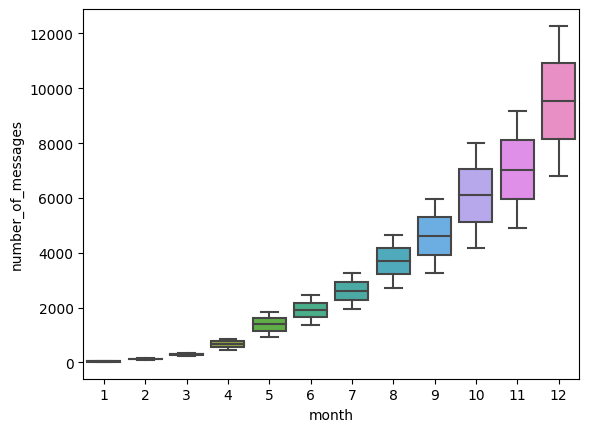

In [41]:
# Plot a boxplot to visualize the distribution of the number of messages
sns.boxplot(data=total_monthly_messages,  x='month', y='number_of_messages')


Customers tend to send way more messages at the end of the year compared to beginining of the year. There is also more outliers in December that send many more messages compared to other months as well. But people tend to use the Surf plan to send out more messages. 

### Internet

        plan  month  monthly_gb_usage
0       surf      1              10.0
1       surf      2             110.0
2       surf      3             312.0
3       surf      4             611.0
4       surf      5            1087.0
5       surf      6            1502.0
6       surf      7            2042.0
7       surf      8            2735.0
8       surf      9            3238.0
9       surf     10            4126.0
10      surf     11            4650.0
11      surf     12            5800.0
12  ultimate      1              29.0
13  ultimate      2             121.0
14  ultimate      3             221.0
15  ultimate      4             343.0
16  ultimate      5             489.0
17  ultimate      6             725.0
18  ultimate      7             973.0
19  ultimate      8            1267.0
20  ultimate      9            1463.0
21  ultimate     10            1878.0
22  ultimate     11            2174.0
23  ultimate     12            2778.0


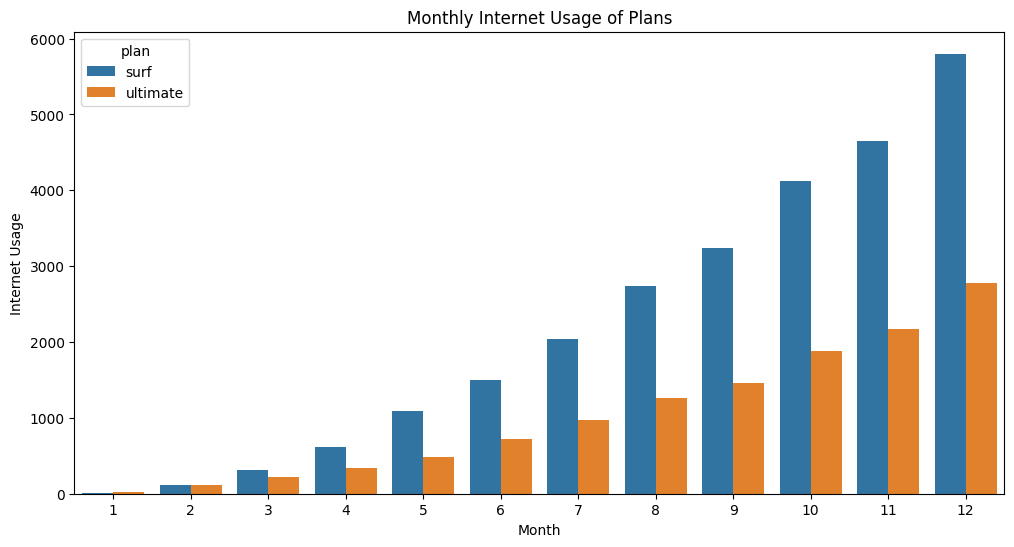

In [42]:
# Compare the amount of internet traffic consumed by users per plan
#merge to get sevice plan in df
monthly_internet = monthly_internet.merge(users_id, on='user_id')
#group to get sum of internet time per month
monthly_internet_usage = monthly_internet.groupby(['plan', 'month'])['monthly_gb_usage'].sum().reset_index()
print(monthly_internet_usage)

#make a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_internet_usage, x='month', y='monthly_gb_usage', hue='plan')
plt.title('Monthly Internet Usage of Plans')
plt.xlabel('Month')
plt.ylabel('Internet Usage')
plt.show()

We see that most of the internet is used in the later part of the year. Surf is used more in all months but January and Feburary. Ultimate is used more in January and both are equal in Febuary.

In [43]:
# Calculate the mean and the variance of internet usage
print(monthly_internet_usage['monthly_gb_usage'].mean())

#calculating the variance
np.var(monthly_internet_usage['monthly_gb_usage'])

1611.8333333333333


2399951.4722222225

<AxesSubplot:xlabel='month', ylabel='monthly_gb_usage'>

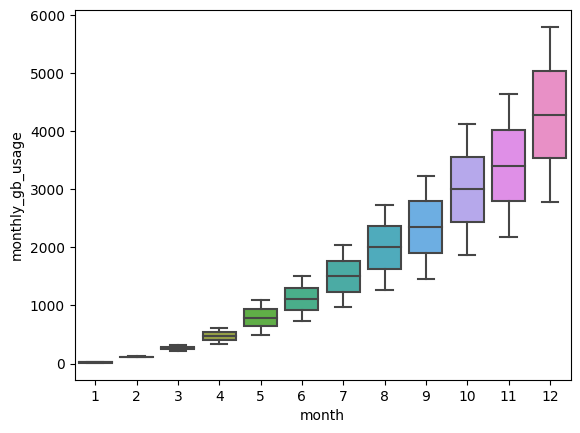

In [44]:
# Plot a boxplot to visualize the distribution of internet usage
sns.boxplot(data=monthly_internet_usage,  x='month', y='monthly_gb_usage')

We see trends that more internet is used in later months compared to earlier months. Surf is used more for internet usage as well.

## Revenue

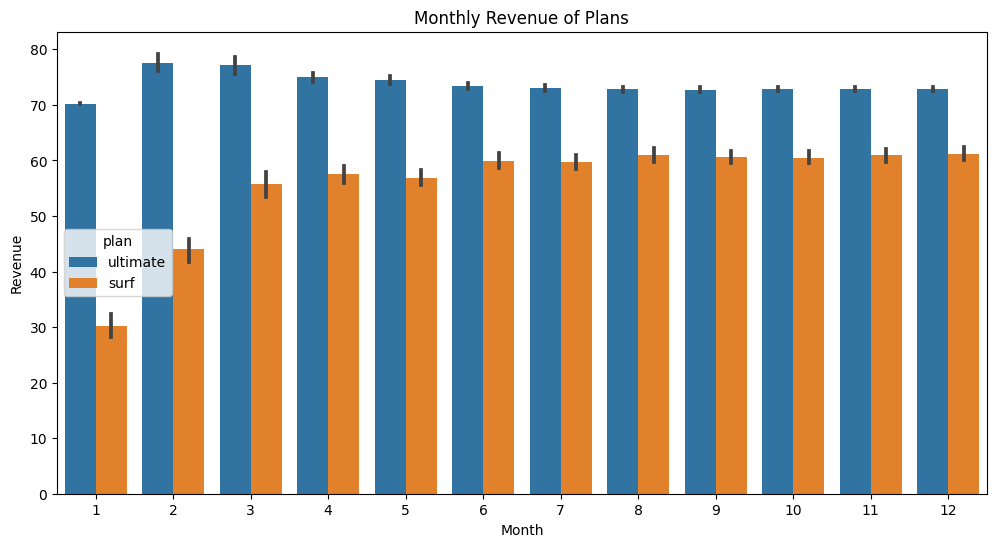

In [45]:
user_month_usage

#make a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=user_month_usage, x='month', y='monthly_revenue', hue='plan')
plt.title('Monthly Revenue of Plans')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

We taken a look at the monthly revenue of each month. As we can see from the data the surf data is bringing in more revenue every month. We notice that surf's revenue is pretty consistent from March-December with January and Febuary it being less. While we see the Ultimate Plan making the most revenue in Febuary and then going down. However June-December revenue for Ultimates plan is consistent. 

In [46]:
# Calculate the mean and the variance of revenue
print(user_month_usage['monthly_revenue'].mean())

#calculating the variance
np.var(user_month_usage['monthly_revenue'])

64.19569730941704


1790.019485578192

<AxesSubplot:xlabel='month', ylabel='monthly_revenue'>

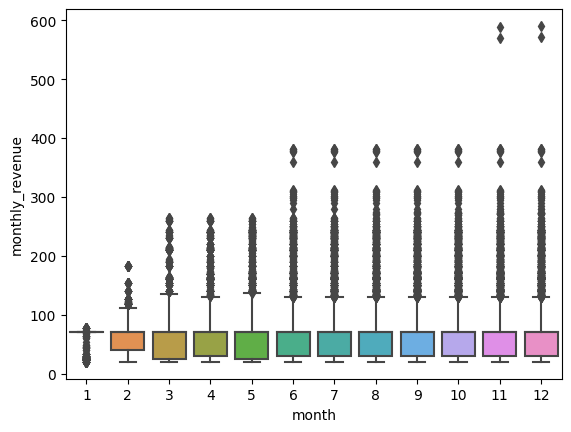

In [47]:
 #Plot a boxplot to visualize the distribution of revenue
sns.boxplot(data=user_month_usage,  x='month', y='monthly_revenue')

As we see from our boxplot, the biggest thing we notice is revenue is pretty light in january but much more consistent for the rest of the months except for spikes in the holiday months November and December, where they have some very high outliers.

## Test statistical hypotheses

Megaline is trying to see if one of the data plans is greater than the other. A significant enough difference in revenue is 5%. Based on the Ultimate plan being 70$ and the Surf Plan costing 20$ the Ultimate Plan should be making more revenue. However if that is not the case than the Surf plan must make more revenue or the same revenue as the Ultimate plan.

In [48]:
# Test the hypotheses that one plan brings in more than the other on average
# filter user_month_usage 
#filter for surf plan
surf_monthly_usage = user_month_usage[user_month_usage['plan'] == 'surf']
#filter for ultimate plan
ultimate_monthly_usage = user_month_usage[user_month_usage['plan'] == 'ultimate']

# Perform t-test
from scipy import stats

# Extract the column to perform t-test
surf_revenue = surf_monthly_usage['monthly_revenue']
ultimate_revenue = ultimate_monthly_usage['monthly_revenue']

p_value = stats.ttest_ind(surf_revenue, ultimate_revenue,  equal_var=False )

alpha = 0.05
print(p_value.pvalue)

if (p_value.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

0.0
We reject the null hypothesis


In [51]:
ultimate_revenue

0        70.0
667      70.0
668      70.0
669      84.0
670      84.0
         ... 
83164    70.0
83165    70.0
83166    70.0
83621    70.0
84739    70.0
Name: monthly_revenue, Length: 27831, dtype: float64

Since we reject the hypothesis we can say that the Ultimate plan does not bring in more than the surf plan.

 New York and New Jersey do not have the same monthly revenue as other regions that Megaline provide services more. A 5% difference is needed to be significant enough to claim that from the data we collected from all our users. However if not then location will not have a factor in bringing in more revenue

In [50]:
# Test the hypotheses that avg revenue from Users in NJ-NY is differnet from other regions
#add cities in df
users_month_usage = user_month_usage.merge(megaline_users, on='user_id')
users_month_usage 
#filtering data to have df with only cities from NY & NJ
nj = ('NJ')
ny = ('NY')
ny_nj_month_usage = users_month_usage['city'].str.contains(nj, ny)
#putting it back in a dataframe
ny_nj_month_data = users_month_usage.loc[ny_nj_month_usage,['user_id', 'month', 'city', 'monthly_revenue']]

ny_nj_month_data

# Perform t-test
from scipy import stats
# Extract the column to perform t-test
ny_nj_revenue = ny_nj_month_data['monthly_revenue']
users_revenue = users_month_usage['monthly_revenue']

p_value = stats.ttest_ind(users_revenue, ny_nj_revenue,  equal_var=False )

alpha = 0.05
print(p_value.pvalue)

if (p_value.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

2.1503221583463606e-47
We reject the null hypothesis


Based on the hypothesis we can reject the idea of New York and New Jersey bringing in more revenue

## General conclusion

We've determined that the Surf plan brings in more revenue than the Ultimate plan and should be advertised more. Most months bring in about the same amount of revenue with exception of the first two months of the year. We also see region does not factor into revenue brought in. Customers also use more calls, internet and send out more messages later in the year compared to the begginging of the year. We also can'tr disprove the possibility that the New York New Jersey area brings in more revenue monthly as well.